In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import statsmodels.api as sm


In [2]:
#Load data
df = pd.read_csv('Profit.csv', parse_dates = ['date'], index_col = ['date'])

In [3]:
#check the data
print(df.columns)
df.head()


Index(['Profit'], dtype='object')


,Profit
date,
2011-01-01,-26
2011-01-03,290
2011-01-04,21
2011-01-04,-22
2011-01-05,-1


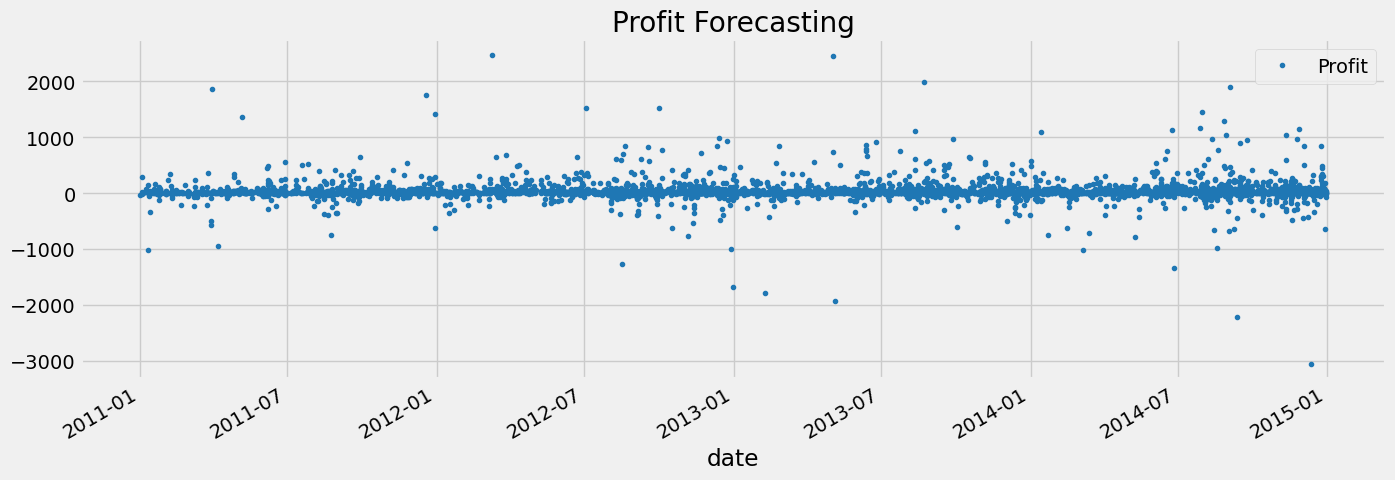

In [4]:
#plot the data
df.plot(style = ".", figsize = (15, 5), color = color_pal[0], title = "Profit Forecasting")
plt.show()

In [5]:
#Create the features (define a function) or split into day, month, year, and quarter 
def create_features(df):
    df = df.copy()
    df["dayofweek"] = df.index.dayofweek
    df["month"] = df.index.month
    df["quarter"] = df.index.quarter
    df["year"] = df.index.year
    df["dayofyear"] = df.index.dayofyear
    return df

df = create_features(df)

In [6]:
#confirm the results of the split
print(df.columns)
df.head()

Index(['Profit', 'dayofweek', 'month', 'quarter', 'year', 'dayofyear'], dtype='object')


,Profit,dayofweek,month,quarter,year,dayofyear
date,,,,,,
2011-01-01,-26,5,1,1,2011,1
2011-01-03,290,0,1,1,2011,3
2011-01-04,21,1,1,1,2011,4
2011-01-04,-22,1,1,1,2011,4
2011-01-05,-1,2,1,1,2011,5


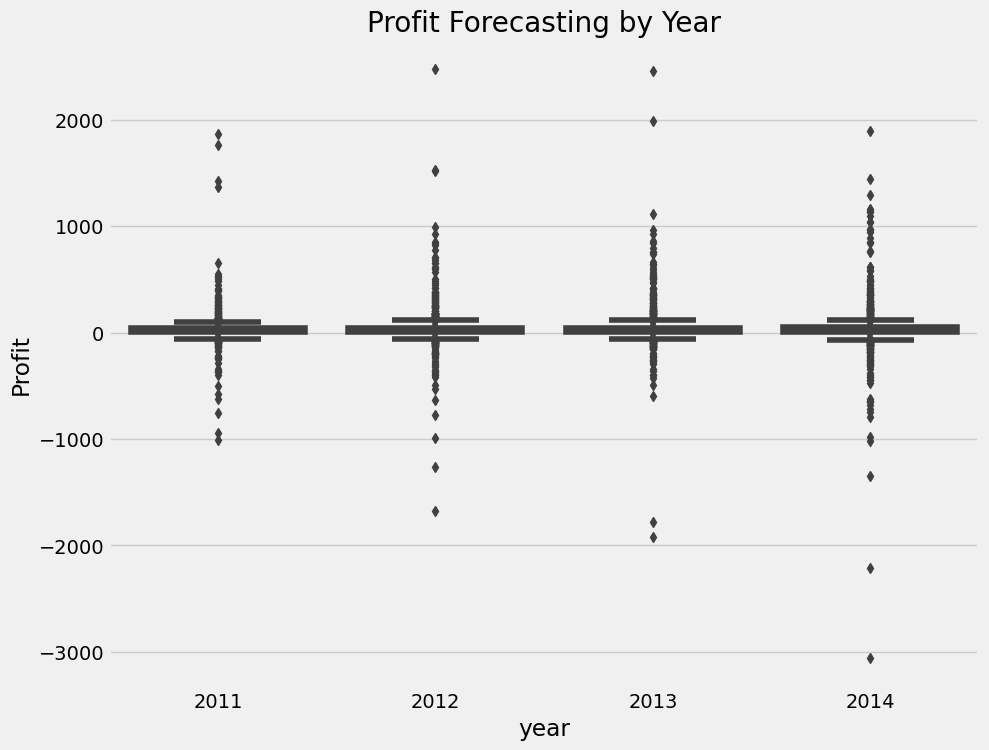

In [7]:
# Visualize target/feature relationship by date
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="year", y="Profit")  # Adjusted 'sales' to 'Profit'
ax.set_title("Profit Forecasting by Year")
plt.show()

In [8]:
#convert or aggregate daily to monthly sales
ts=df['Profit'].resample('M').sum()

<Axes: xlabel='date'>

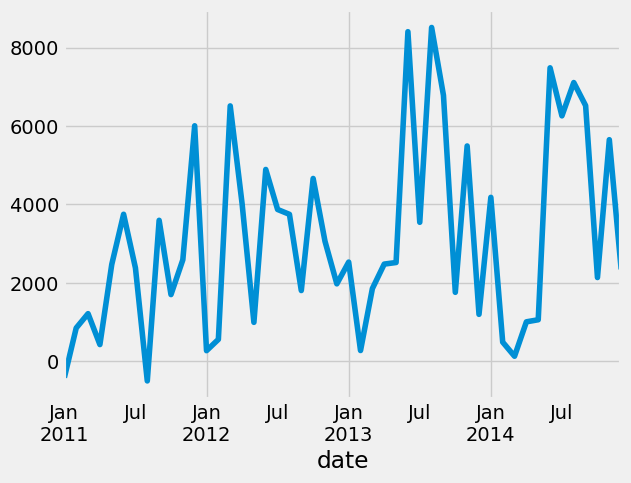

In [9]:
#Plot the new dataset
ts.plot()

In [10]:
#Determine the number of months in the dataset - based on the length, then determine the size of train and test 
len(ts)

48

In [11]:
#Set train and test data 
train=ts[:20]
test=ts[20:]

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(5,0,4,)).fit()

/Users/rodri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/rodri/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/rodri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
#Create the model
pred=model.predict(start=len(train), end=(len(ts)-1))


In [16]:
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test,pred))

In [17]:
#check the results
error

3518.3133643957744

<Axes: xlabel='date'>

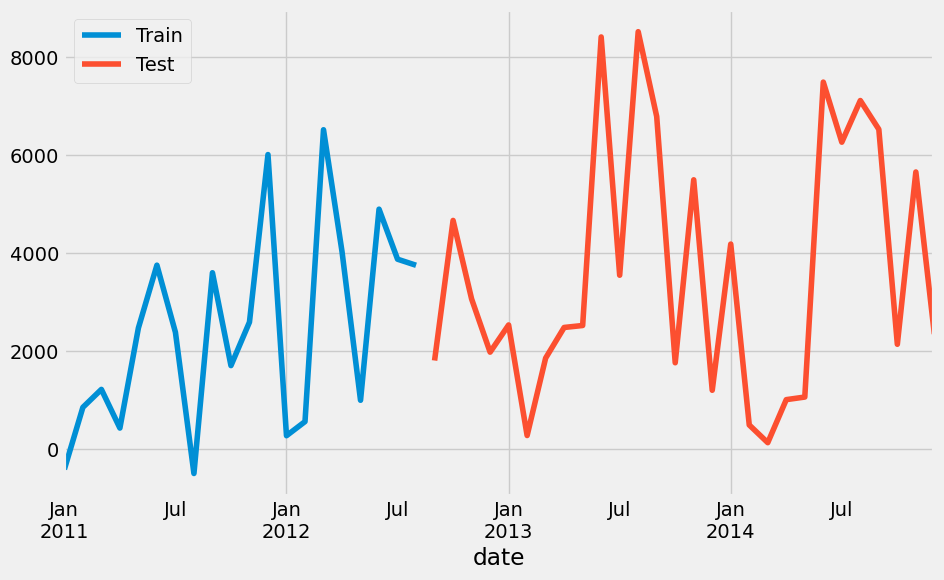

In [18]:
#Plot the results
train.plot(legend=True, label='Train', figsize=(10,6))
test.plot(legend=True, label='Test', figsize=(10,6))

In [19]:
#Forecasting another 24 months 
final_model = ARIMA(ts, order=(5,0,4)).fit()
prediction=final_model.predict(len(ts),len(ts)+24)

/Users/rodri/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

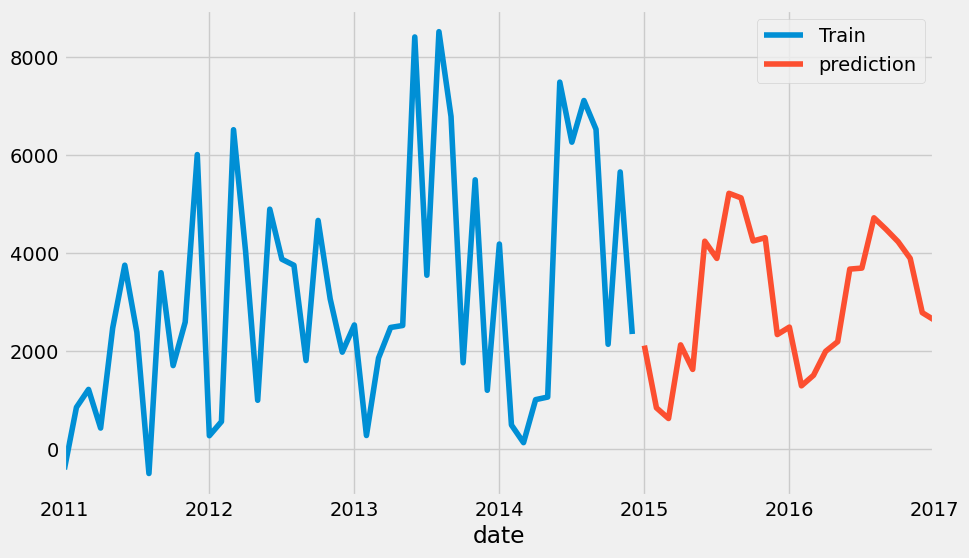

In [20]:
#plot the results
ts.plot(legend=True, label='Train', figsize=(10,6))
prediction.plot(legend=True, label='prediction')

In [ ]:
explain how does the model complain to the actual data